In [1]:
import numpy as np
import pandas as pd
import sympy as sp
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d, Akima1DInterpolator,PchipInterpolator

## Exercise 1

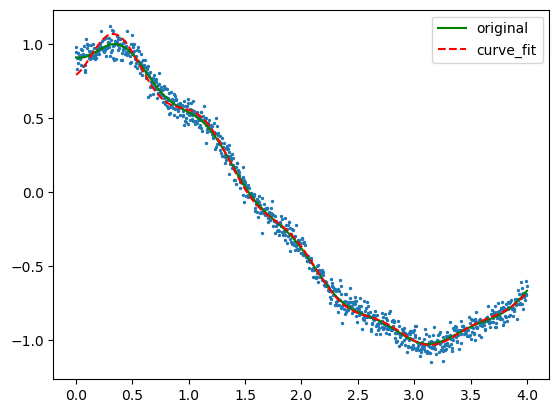

In [2]:
from scipy import optimize

np.random.seed(10)
a = 2.6
phi = 3.4

# Let's generate fake data that we can "fit" then 
def f(x, a, phi):
    return np.sinc(a * x + phi) + np.cos(x)

#random makes it look like experimental data
x_test = np.linspace(0, 4, 1000)
y_test = f(x_test, a, phi) + 0.05*np.random.normal(size=1000)

#write and then read data
np.savetxt("data_fit.txt",np.column_stack((x_test,y_test)),fmt='%f')
data_fake=np.genfromtxt("data_fit.txt",dtype=float)
x = data_fake[:,0]
y = data_fake[:,1]

params, params_cov = optimize.curve_fit(f, x, y)

plt.scatter(x, y,s=2)
plt.plot(x,f(x,a,phi),'g-',label='original')
plt.plot(x, f(x, *params), 'r--',label='curve_fit')
plt.legend()

## Exercise 2

using scipy: 666.6666666666667
using sympy: 666.6666666666666


(-10.0, 10.0)

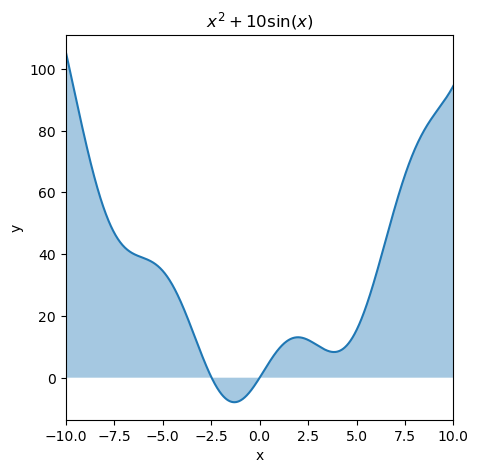

In [24]:
def func(x):
    return x**2 + 10*np.sin(x)

res_scipy, _ = quad(func, -10, 10)


x = sp.Symbol('x')
res_sympy = sp.integrate(x**2 + 10*sp.sin(x), (x,-10,10))

print("using scipy:",res_scipy)
print("using sympy:",float(res_sympy))

x = np.linspace(-10,10,1000)
y = func(x)

fig = plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.fill_between(x, y, step="pre", alpha=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,10)
plt.title('$x^2+10\sin(x)$')

## Exercise 3

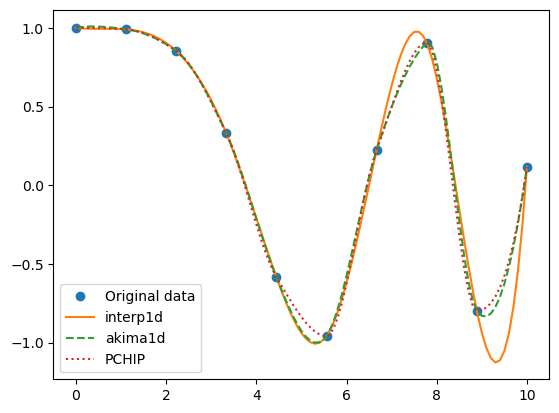

In [72]:
class My_Interpolation():
    def __init__(self,a,b):
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,10)
        self.y = self.func()
        self.x_interp = np.linspace(0, 10, num=101)

    def func(self):
        return np.cos(-self.x**2/9.0)

    def my_interp1d(self):
        f = interp1d(self.x, self.y, kind='cubic')
        self.y_interp = f(self.x_interp)

    def akima(self):
        f = Akima1DInterpolator(self.x,self.y)
        self.y_interp = f(self.x_interp)

    def pchip(self):
        f = PchipInterpolator(self.x,self.y)
        self.y_interp = f(self.x_interp)

    def plots(self):
        plt.plot(self.x, self.y, 'o', label='Original data')
        self.my_interp1d()
        plt.plot(self.x_interp, self.y_interp, label='interp1d')

        self.akima()
        plt.plot(self.x_interp, self.y_interp, linestyle='--', label='akima1d')

        self.pchip()
        plt.plot(self.x_interp, self.y_interp, linestyle=':', label='PCHIP')

        plt.legend()

ins = My_Interpolation(0,10)
ins.plots()

## Exercise 4

In [40]:
df = pd.read_csv('data/example.csv')
df.loc[:,'course1':] += 5
df.loc[:,'course1':] = df.loc[:,'course1':].mask(df.loc[:,'course1':]>30,30)
df

,name,course1,course2,course3,course4
0,Marie,29,23,30,25
1,John,23,30,30,30
2,Kati,26,29,30,30
3,Olaf,30,30,30,30
4,Mark,29,30,30,26
5,Olga,28,30,30,30
6,Jean,23,30,30,29
7,Alex,24,25,30,30
8,Pier,29,30,28,30
9,Bennet,29,30,30,30


(array([[2., 1., 1., 1., 0., 1., 4., 1.],
        [1., 0., 2., 0., 0., 0., 1., 7.],
        [1., 0., 0., 0., 0., 1., 0., 9.],
        [1., 0., 1., 1., 0., 0., 1., 7.]]),
 array([22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 4 BarContainer objects>)

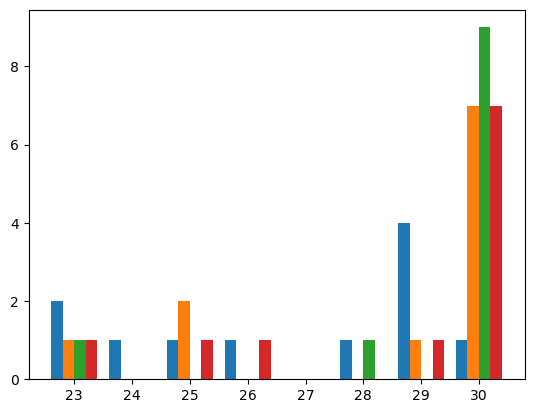

In [55]:
plt.hist([df["course1"],df["course2"],df["course3"],df["course4"]],bins=8,range=(22.5,30.5))

## Exercise 5

In [114]:
df = pd.read_csv('data/cars.csv')
df.drop(2,inplace=True)
df['Price'] = [8000, 6500, 7000, 7500, 7300, 7000, 9000, 6500, 7800]
df

,Year,Make,Model,Length,Price
0,1997,Ford,E350,2.34,8000
1,2000,Mercury,Cougar,2.38,6500
3,1999,Jeep,Grand Cherokee,2.56,7000
4,1998,Dodge,Intrepid,3.01,7500
5,1997,Ford,E350,2.34,7300
6,1999,Ford,E350,2.34,7000
7,1996,Ford,Mustang,2.37,9000
8,2000,Ford,Mustang,2.34,6500
9,1997,Ford,Taurus,2.34,7800


In [115]:
df.Length.mean(), df.Price.median()

(2.4466666666666668, 7300.0)

In [116]:
df_new = df[df.Price>7000]
df_new.sort_values('Price',ascending=False)

,Year,Make,Model,Length,Price
7,1996,Ford,Mustang,2.37,9000
0,1997,Ford,E350,2.34,8000
9,1997,Ford,Taurus,2.34,7800
4,1998,Dodge,Intrepid,3.01,7500
5,1997,Ford,E350,2.34,7300


## Exercise 6

In [130]:
datas = np.random.random(100)
np.savetxt("data_random.txt",datas,fmt='%f')

#using numpy
data=np.genfromtxt("data_random.txt",dtype=float)
# data.describe()

#using pandas
df= pd.read_csv("data_random.txt",header=None)
df.describe()

,0
count,100.000000
mean,0.524995
std,0.302876
min,0.001732
25%,0.272310
50%,0.577849
75%,0.791530
max,0.988110


In [137]:
dict(count=np.size(data), mean=np.mean(data), std=np.std(data), min=np.min(data), percent25=np.percentile(data,25), percent50=np.percentile(data,50), percent75=np.percentile(data,75), max=np.max(data))


{'count': 100,
 'mean': 0.52499524,
 'std': 0.30135758221309517,
 'min': 0.001732,
 'percent25': 0.27231025000000003,
 'percent50': 0.5778490000000001,
 'percent75': 0.7915304999999999,
 'max': 0.98811}